In [29]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from pandas.io.json import json_normalize
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

Creating a dataframe where I gather data from the Pudgy Penguins collection. I am selecting this because it is a collection that falls under the Top 20 highest volume collections on Opensea of all time, and the current price point is on the lower scale with a floor (at the time of writing) of 1.12 ETH. 

In [5]:
pp_events_1 = []
for offset in range(0,6000,50):
    url = "https://api.opensea.io/api/v1/events?only_opensea=true&collection_slug=pudgypenguins&occurred_after=2021-07-19T22:32:47.007226"
    querystring = {"offset":f"{offset}","limit":"50", 'event_type': 'successful'}
    headers = {"X-API-KEY": "5d9cef30163b4017b998078ba58c08be"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    json = response.json()
    df = json_normalize(json['asset_events'])
    pp_events_1.append(df)
    print(f"Offset is {offset} and {len(df)} assets added")
pudgy_data = pd.concat([df for df in pp_events_1], ignore_index=True, sort=False)
print("")
print("")

<ipython-input-5-c05d9a52e65c>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(json['asset_events'])


Offset is 0 and 50 assets added
Offset is 50 and 50 assets added
Offset is 100 and 50 assets added
Offset is 150 and 50 assets added
Offset is 200 and 50 assets added
Offset is 250 and 50 assets added
Offset is 300 and 50 assets added
Offset is 350 and 50 assets added
Offset is 400 and 50 assets added
Offset is 450 and 50 assets added
Offset is 500 and 50 assets added
Offset is 550 and 50 assets added
Offset is 600 and 50 assets added
Offset is 650 and 50 assets added
Offset is 700 and 50 assets added
Offset is 750 and 50 assets added
Offset is 800 and 50 assets added
Offset is 850 and 50 assets added
Offset is 900 and 50 assets added
Offset is 950 and 50 assets added
Offset is 1000 and 50 assets added
Offset is 1050 and 50 assets added
Offset is 1100 and 50 assets added
Offset is 1150 and 50 assets added
Offset is 1200 and 50 assets added
Offset is 1250 and 50 assets added
Offset is 1300 and 50 assets added
Offset is 1350 and 50 assets added
Offset is 1400 and 50 assets added
Offset i

In [6]:
pudgy_data

,approved_account,asset_bundle,auction_type,bid_amount,collection_slug,contract_address,created_date,custom_event_name,dev_fee_payment_event,duration,...,asset_bundle.permalink,asset_bundle.sell_orders,dev_fee_payment_event.transaction.from_account.user,dev_fee_payment_event.transaction.from_account.profile_img_url,dev_fee_payment_event.transaction.from_account.address,dev_fee_payment_event.transaction.from_account.config,dev_fee_payment_event.transaction.to_account.user,dev_fee_payment_event.transaction.to_account.profile_img_url,dev_fee_payment_event.transaction.to_account.address,dev_fee_payment_event.transaction.to_account.config
0,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30T04:55:10.583259,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30T04:51:55.670198,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30T03:51:46.229835,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30T03:48:55.066759,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30T03:48:38.868786,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-08-24T06:17:21.650842,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5996,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-08-24T06:13:48.896476,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-08-24T06:13:00.189498,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5998,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-08-24T06:11:55.189434,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pudgy_data["created_date"] = pd.to_datetime(pudgy_data["created_date"])

In [9]:
pudgy_data = pudgy_data.set_index(pudgy_data["created_date"])

In [11]:
pudgy_data.head()

,approved_account,asset_bundle,auction_type,bid_amount,collection_slug,contract_address,created_date,custom_event_name,dev_fee_payment_event,duration,...,asset_bundle.permalink,asset_bundle.sell_orders,dev_fee_payment_event.transaction.from_account.user,dev_fee_payment_event.transaction.from_account.profile_img_url,dev_fee_payment_event.transaction.from_account.address,dev_fee_payment_event.transaction.from_account.config,dev_fee_payment_event.transaction.to_account.user,dev_fee_payment_event.transaction.to_account.profile_img_url,dev_fee_payment_event.transaction.to_account.address,dev_fee_payment_event.transaction.to_account.config
created_date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 04:55:10.583259,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30 04:55:10.583259,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 04:51:55.670198,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30 04:51:55.670198,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 03:51:46.229835,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30 03:51:46.229835,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 03:48:55.066759,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30 03:48:55.066759,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 03:48:38.868786,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30 03:48:38.868786,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I want to create a function where I perform the necessary transformations (such as the above) to the dataset automatically after import from the API.

In [13]:
def opensea_to_dt(df): 
    df["created_date"] = pd.to_datetime(df["created_date"])
    df2 = df.set_index(df["created_date"])
    return df2

In [14]:
def fix_prices(price):
    return price * 9.999999999999999e-19

In [15]:
def opensea_df_clean(df):
    df["total_price"].dropna(inplace=True)
    df["total_price"] = pd.to_numeric(df["total_price"], downcast="float", errors="coerce")
    df['total_price_eth'] = df["total_price"].apply(fix_prices)
    df_columns_keep = ["id", "quantity", "total_price_eth", "asset.id", "asset.token_id", "asset.num_sales", 
                   "asset.name", "seller.address", "transaction.block_hash", "transaction.block_number",
                  "transaction.id", "transaction.timestamp", "transaction.transaction_hash", "transaction.transaction_index",
                  "winner_account.address"]
    new_df = df[df_columns_keep]
    return new_df

Let's try opensea_df_clean on our pudgy data.

In [16]:
pudgy2 = opensea_df_clean(pudgy_data)

In [17]:
pudgy2

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-11-30 04:55:10.583259,2245898989,1,1.1400,32451727.0,2473,6.0,Pudgy Penguin #2473,0x98b33d164e41d7a0a7eb6393d8e92d183f4a92bd,0xbc66ad48f303576f9287830714f57a3b974adfce78f2...,13712870,212307599,2021-11-30T04:54:42,0xa118f1d477e8e4915afeb4cf75d62d87dfbd37259c7b...,196,0x8b16008ce9cbea16c5152eb366cc35b478639af7
2021-11-30 04:51:55.670198,2245854433,1,2.5999,32458946.0,8726,5.0,Pudgy Penguin #8726,0x3d620bd5e05b3896081646e6cbedcbc9cb860d5f,0xee29688b98109e2f18943d58a6fa8f05c8c83b26d2fa...,13712847,212306027,2021-11-30T04:51:39,0xdbf25b08355444f2c8a75172661365e0978fc34ed4f4...,226,0x304a97c9a85c92c93ca24e0a85b69f892b67355e
2021-11-30 03:51:46.229835,2245023606,1,1.0990,32457972.0,7854,4.0,Pudgy Penguin #7854,0x9d81b6f001bd7e5fcd71713519aab5f27f2a8415,0x93ba725dd041e7d05a806a799c789ef15e0cb72dc28f...,13712597,212275246,2021-11-30T03:50:42,0xa55da48394f41280b33080086e8e135b9bc16d9a521d...,409,0x78b15fef736f94a717a8e8d29380ef87b0824827
2021-11-30 03:48:55.066759,2244984457,1,1.1499,32459104.0,8778,5.0,Pudgy Penguin #8778,0x3d620bd5e05b3896081646e6cbedcbc9cb860d5f,0xed19134161eff1cb6c3326733eb5fb1e455c5a48ac69...,13712585,212274170,2021-11-30T03:48:25,0xc416a5c30b70dbc8b2234d5da85a5c29048353477611...,201,0x78b15fef736f94a717a8e8d29380ef87b0824827
2021-11-30 03:48:38.868786,2244980842,1,1.1000,32458746.0,8469,4.0,Pudgy Penguin #8469,0x7055d2b309057d3396f7d005c8e1d61269b993a0,0x8a493330f77554374bd5bcec4b8e917b57d866304791...,13712584,212274051,2021-11-30T03:48:22,0xbb9566b1d1b868b2d7e2fbd640133e0c53f0696c471a...,56,0x4ac92d9a71724ed484e5e3ed61b290e18d825400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24 06:17:21.650842,619139237,1,3.4000,32449454.0,629,1.0,Pudgy Penguin #629,0xb38bd68a6f0ba599808d65c7a9cf2a428105b680,0x8543082bb01e230eb43b266be894341142c27400d338...,13086357,152619323,2021-08-24T06:16:33,0xbeebb584e5d798c9a7a298946b091a03512a972b6cd4...,249,0x4f8c2d5397262653cd8956cb977a0ba3660210c7
2021-08-24 06:13:48.896476,619130758,1,3.0500,32453386.0,3875,7.0,Pudgy Penguin #3875,0x0e5d9b06291205dd02a28247c59cccb6517c36d8,0x1fedfba8f13d13df2c892a3be3909cac98e47193e43a...,13086344,152618212,2021-08-24T06:13:22,0x69fdc41d8c9e4b0457992a7377f638e6c6cbddbdb771...,27,0x561acd2d4ca85e07bde08006777f44a8bd016043
2021-08-24 06:13:00.189498,619128859,1,3.1890,32452776.0,3269,3.0,Pudgy Penguin #3269,0x6f5765b3bbde5f02df45f989badc5528e4bc66f7,0x4e026a6311da580deda33891bbe2b4d90e1424414a33...,13086339,152617985,2021-08-24T06:12:43,0xedf9513881b274fce2f69276d2568a17e9a07f69ae4b...,92,0xfc70c1f67f6826d8849c20b0ce1dea9ac39e0f38


Our Opensea converting functions will allow us to easily prepare our data for EDA and modeling, since we plan on applying this to multiple collections!

In [18]:
pudgy2.to_csv("pudgy_data.csv")

<AxesSubplot:xlabel='created_date'>

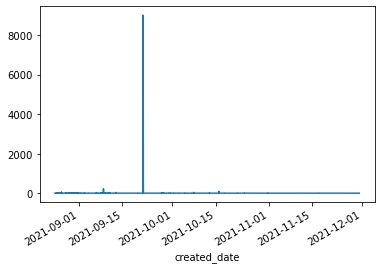

In [19]:
pudgy2["total_price_eth"].plot()

In [21]:
pudgy2["total_price_eth"].sort_values(ascending=False)

created_date
2021-09-21 15:34:37.671717    9.000000e+03
2021-09-08 20:57:01.119825    2.250000e+02
2021-10-16 01:09:14.812758    1.000000e+02
2021-08-26 08:37:28.798396    6.200000e+01
2021-10-08 00:51:04.412129    4.000000e+01
                                  ...     
2021-11-08 04:29:19.495419    1.000000e-02
2021-11-14 01:39:38.238604    2.000000e-05
2021-10-19 09:14:20.546606    1.700000e-08
2021-10-15 10:35:10.755520    1.000000e-08
2021-11-03 18:34:34.320431    6.000000e-09
Name: total_price_eth, Length: 6000, dtype: float64

In [26]:
pudgy2.loc[pudgy2["total_price_eth"] >= 100]


,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-10-16 01:09:14.812758,1391222326,1,100.000002,32451912.0,2447,2.0,Pudgy Penguin #2447,0xbabecf3350b64fbc103edd7d61a541edaa91bc47,0xe34f0029df5250cdd557cd47ef738fa91ceee712a2da...,13425999,182292488,2021-10-16T01:08:28,0x2a60fc8c5e109a731294bd5f57704d387247b30ea80d...,59,0x8c0d2b62f133db265ec8554282ee60eca0fd5a9e
2021-09-21 15:34:37.671717,1015153246,1,9000.000251,32454181.0,4498,3.0,Pudgy Penguin #4498,0xfc229a3d9f8bff3f4c6d09a058cd2687e2b774d1,0xa483770eb3653ef0c5d57311cca8ddc05876f57290d0...,13269956,168335058,2021-09-21T15:34:18,0x33567ee97cce676a33f010004dc412549d3b557ed504...,16,0x1f0ea93d0b4fcd64fe38edcd7c84efcc4a951d97
2021-09-08 20:57:01.119825,814387402,1,224.999996,32456936.0,6873,2.0,Pudgy Penguin #6873,0x8adc269827c9cba96bae388a1e023acdab7f622d,0x95d26b6ce51eb1ef6312d2251513b6ce13ccb10f77a7...,13187396,161049463,2021-09-08T20:56:30,0x0d8a6fe4e5263bb6c6380f1551f03a97b4285b5003b9...,93,0x4c4a5490deefefa16f49a1a48c9acdc60f4117d0


After further investigating this, the 9000 ETH sale did not happen. This was not an Ethereum transaction, but a "DAI" transaction. This is a rare occurrence in collections that are primarily traded on Ethererum. We can safely remove this outlier from our data.  

In [27]:
dropthis1 = pd.Timestamp("2021-09-21 15:34:37.671717")
pudgy3 = pudgy2.drop(dropthis1)
pudgy3

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-11-30 04:55:10.583259,2245898989,1,1.1400,32451727.0,2473,6.0,Pudgy Penguin #2473,0x98b33d164e41d7a0a7eb6393d8e92d183f4a92bd,0xbc66ad48f303576f9287830714f57a3b974adfce78f2...,13712870,212307599,2021-11-30T04:54:42,0xa118f1d477e8e4915afeb4cf75d62d87dfbd37259c7b...,196,0x8b16008ce9cbea16c5152eb366cc35b478639af7
2021-11-30 04:51:55.670198,2245854433,1,2.5999,32458946.0,8726,5.0,Pudgy Penguin #8726,0x3d620bd5e05b3896081646e6cbedcbc9cb860d5f,0xee29688b98109e2f18943d58a6fa8f05c8c83b26d2fa...,13712847,212306027,2021-11-30T04:51:39,0xdbf25b08355444f2c8a75172661365e0978fc34ed4f4...,226,0x304a97c9a85c92c93ca24e0a85b69f892b67355e
2021-11-30 03:51:46.229835,2245023606,1,1.0990,32457972.0,7854,4.0,Pudgy Penguin #7854,0x9d81b6f001bd7e5fcd71713519aab5f27f2a8415,0x93ba725dd041e7d05a806a799c789ef15e0cb72dc28f...,13712597,212275246,2021-11-30T03:50:42,0xa55da48394f41280b33080086e8e135b9bc16d9a521d...,409,0x78b15fef736f94a717a8e8d29380ef87b0824827
2021-11-30 03:48:55.066759,2244984457,1,1.1499,32459104.0,8778,5.0,Pudgy Penguin #8778,0x3d620bd5e05b3896081646e6cbedcbc9cb860d5f,0xed19134161eff1cb6c3326733eb5fb1e455c5a48ac69...,13712585,212274170,2021-11-30T03:48:25,0xc416a5c30b70dbc8b2234d5da85a5c29048353477611...,201,0x78b15fef736f94a717a8e8d29380ef87b0824827
2021-11-30 03:48:38.868786,2244980842,1,1.1000,32458746.0,8469,4.0,Pudgy Penguin #8469,0x7055d2b309057d3396f7d005c8e1d61269b993a0,0x8a493330f77554374bd5bcec4b8e917b57d866304791...,13712584,212274051,2021-11-30T03:48:22,0xbb9566b1d1b868b2d7e2fbd640133e0c53f0696c471a...,56,0x4ac92d9a71724ed484e5e3ed61b290e18d825400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24 06:17:21.650842,619139237,1,3.4000,32449454.0,629,1.0,Pudgy Penguin #629,0xb38bd68a6f0ba599808d65c7a9cf2a428105b680,0x8543082bb01e230eb43b266be894341142c27400d338...,13086357,152619323,2021-08-24T06:16:33,0xbeebb584e5d798c9a7a298946b091a03512a972b6cd4...,249,0x4f8c2d5397262653cd8956cb977a0ba3660210c7
2021-08-24 06:13:48.896476,619130758,1,3.0500,32453386.0,3875,7.0,Pudgy Penguin #3875,0x0e5d9b06291205dd02a28247c59cccb6517c36d8,0x1fedfba8f13d13df2c892a3be3909cac98e47193e43a...,13086344,152618212,2021-08-24T06:13:22,0x69fdc41d8c9e4b0457992a7377f638e6c6cbddbdb771...,27,0x561acd2d4ca85e07bde08006777f44a8bd016043
2021-08-24 06:13:00.189498,619128859,1,3.1890,32452776.0,3269,3.0,Pudgy Penguin #3269,0x6f5765b3bbde5f02df45f989badc5528e4bc66f7,0x4e026a6311da580deda33891bbe2b4d90e1424414a33...,13086339,152617985,2021-08-24T06:12:43,0xedf9513881b274fce2f69276d2568a17e9a07f69ae4b...,92,0xfc70c1f67f6826d8849c20b0ce1dea9ac39e0f38


<AxesSubplot:xlabel='created_date'>

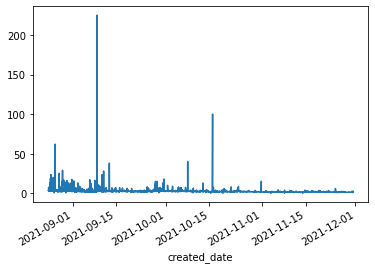

In [28]:
pudgy3["total_price_eth"].plot()

In [30]:
pudgy3.to_csv("pudgy_data.csv")